# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_excel('CTG.xls', sheet_name=2, index_col='Date')
data

,FileName,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
Date,,,,,,,,,,,,,,,,,,,,,
1996-12-01,Variab10.txt,CTG0001.txt,240,357,120,120,0,0,0,73,...,0,0,0,0,0,0,1,0,9,2
1996-05-03,Fmcs_1.txt,CTG0002.txt,5,632,132,132,4,0,4,17,...,0,0,0,1,0,0,0,0,6,1
1996-05-03,Fmcs_1.txt,CTG0003.txt,177,779,133,133,2,0,5,16,...,0,0,0,1,0,0,0,0,6,1
1996-05-03,Fmcs_1.txt,CTG0004.txt,411,1192,134,134,2,0,6,16,...,0,0,0,1,0,0,0,0,6,1
1996-05-03,Fmcs_1.txt,CTG0005.txt,533,1147,132,132,4,0,5,16,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-06-06,S8001045.dsp,CTG2124.txt,2059,2867,140,140,0,0,6,79,...,0,0,1,0,0,0,0,0,5,2
1998-06-06,S8001045.dsp,CTG2125.txt,1576,2867,140,140,1,0,9,78,...,0,0,1,0,0,0,0,0,5,2
1998-06-06,S8001045.dsp,CTG2126.txt,1576,2596,140,140,1,0,7,79,...,0,0,1,0,0,0,0,0,5,2


# Cleaning data

In [3]:
data.drop(['FileName','SegFile'],axis = 1, inplace = True)

In [4]:
data.shape

(2126, 36)

In [5]:
# Selecting features
X = data.iloc[:,1:-1]
# Selecting dependable variable
y = data.iloc[:,-1]

In [6]:
# Predict multicollinearity by directly looking at the eigen vector of a correlation matrix.
# Values close to zero indicate multicolineairty
corr = X.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr)
np.round(eigenvalues, 1)

array([ 7.2,  4.2,  3.3,  2.1,  1.7,  1.6,  1.3,  1.2,  1.1,  1.1,  1. ,
        1. ,  0.9,  0.9,  0.8,  0.7,  0.7,  0.6,  0.4,  0. ,  0. ,  0.4,
        0.4,  0.1,  0.1,  0.2,  0.2,  0.2,  0.3,  0.3, -0. , -0. , -0. ,
       -0. ])

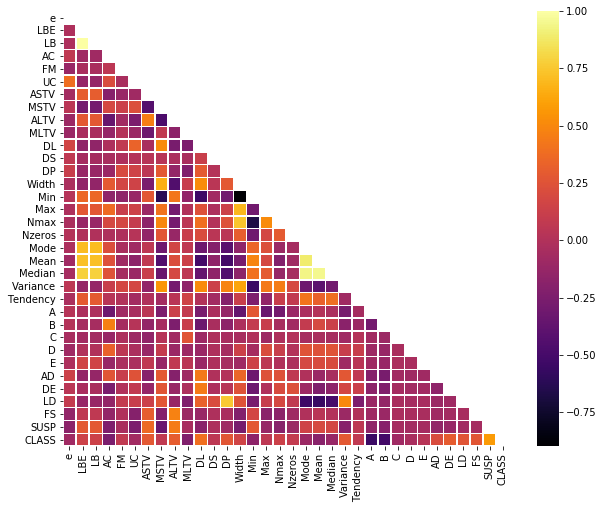

In [7]:
# Assessing correlation between most important features
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,8))
sns.heatmap(corr, linewidth=0.5,cmap = 'inferno', mask = mask)
plt.show()

In [8]:
X1 = X.drop(['Mode','Median','LBE'], axis = 1)

In [9]:
# Checking for multicollinearity by directly looking at the eigen vector of a correlation matrix after removing correlated features
# Values close to zero indicate multicolineairty
corr = X1.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr)
np.round(eigenvalues, 1)

array([ 6.3,  3.3,  2.6,  2. ,  1.7,  1.4,  1.3,  1.2,  1.1,  1.1,  1. ,
        1. ,  0.9,  0.9,  0.8,  0.7,  0.7,  0.6,  0. ,  0.4,  0.1,  0.1,
        0.4,  0.4,  0.2,  0.2,  0.3,  0.3, -0. , -0. , -0. ])

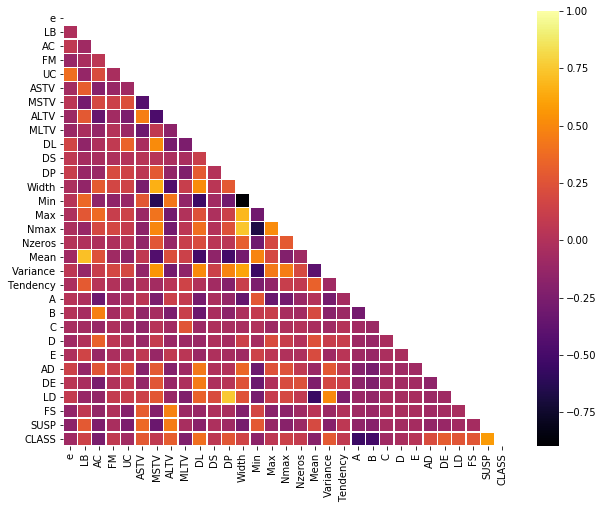

In [10]:
# Re-assessing correlation between most important features
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,8))
sns.heatmap(corr, linewidth=0.5,cmap = 'inferno', mask = mask)
plt.show()

In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Fitting logistic regression Classification to the Training set
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[408,   2,   0],
       [  4,  68,   0],
       [  1,   0,  49]], dtype=int64)

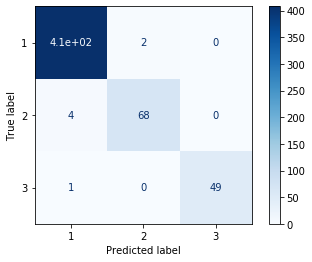

In [16]:
# Visualising the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

In [17]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(f'mean accuracy: {accuracies.mean()}')
print(f'accuracy standard deviation: {accuracies.std()}')

mean accuracy: 0.9893396226415095
accuracy standard deviation: 0.00628008364399162
